## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
from sklearn.feature_selection import mutual_info_classif

## Reading the Data

In [ ]:
dataset= pd.read_excel(r"C:\Users\hmeli\OneDrive\Masaüstü\DataGlacierDataSets\Project\Healthcaredata.xlsx")
df=dataset.copy()
print("Data imported successfully!")

Data imported successfully!


## Properties of the Dataset

In [ ]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [ ]:
df.tail()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3423,P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1


## Dataset information

In [ ]:
#overall dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [ ]:
df.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [ ]:
#We have 3424 observations and 69 features.
df.shape

(3424, 69)

## Checking whether the dataset has any null values

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

## Dataset Preparation:

## Examining Continues Variables:

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dexa_Freq_During_Rx,3424.0,3.016063,8.136545,0.0,0.0,0.0,3.0,146.0
Count_Of_Risks,3424.0,1.239486,1.094914,0.0,0.0,1.0,2.0,7.0


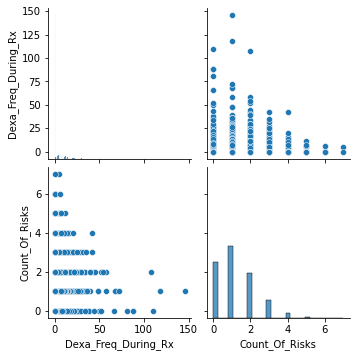

In [ ]:
sns.pairplot(df)

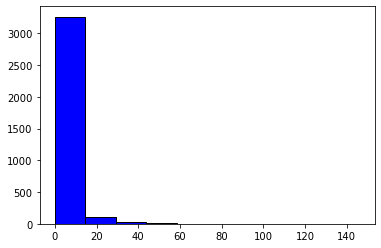

In [ ]:
plt.hist(df["Dexa_Freq_During_Rx"], color= "blue", edgecolor = 'black');

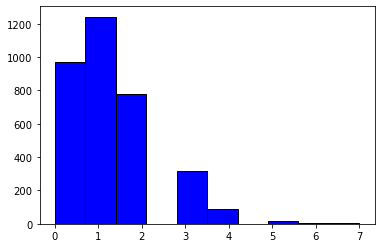

In [ ]:
plt.hist(df["Count_Of_Risks"], color= "blue", edgecolor = 'black');

## Detecting Outliers

In [ ]:
df_Dexa= df["Dexa_Freq_During_Rx"]

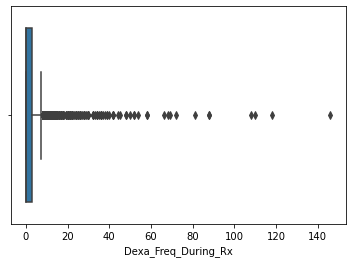

In [ ]:
sns.boxplot(x=df_Dexa);

In [ ]:
Q1=df_Dexa.quantile(0.25)
Q3=df_Dexa.quantile(0.75)
IQR=Q3-Q1

In [ ]:
lower_bound= Q1-1.5*IQR
upper_bound= Q3+ 1.5*IQR

In [ ]:
upper_bound

7.5

In [ ]:
outlier_dexa= (df_Dexa< lower_bound) | (df_Dexa> upper_bound)
outlier_dexa.head()

0    False
1    False
2    False
3    False
4    False
Name: Dexa_Freq_During_Rx, dtype: bool

In [ ]:
df[outlier_dexa]

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
32,P33,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
33,P34,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
62,P63,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
65,P66,Persistent,Female,Asian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,2
89,P90,Non-Persistent,Female,Other/Unknown,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,Y,N,N,N,N,N,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,P3385,Persistent,Female,Caucasian,Not Hispanic,South,>75,ORTHOPEDIC SURGERY,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,Y,N,N,N,N,N,N,2
3396,P3397,Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3400,P3401,Non-Persistent,Female,Caucasian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,2
3411,P3412,Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1


In [ ]:
df[outlier_dexa].index

Int64Index([  32,   33,   62,   65,   89,  101,  110,  116,  164,  180,
            ...
            3311, 3325, 3363, 3378, 3382, 3384, 3396, 3400, 3411, 3414],
           dtype='int64', length=460)

## Solving Outliers for "Dexa_Freq_During_Rx":

In [ ]:
#Solving outliers for Dexa:
df_Dexa[outlier_dexa]

32      20
33      13
62      12
65      20
89      10
        ..
3384    12
3396    10
3400    12
3411     8
3414     8
Name: Dexa_Freq_During_Rx, Length: 460, dtype: int64

In [ ]:
df_Dexa[outlier_dexa]=upper_bound

<ipython-input-118-6f2cd98ff1ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Dexa[outlier_dexa]=upper_bound


In [ ]:
#checking whether we changed the outliers successfully:
df_Dexa[outlier_dexa]

32      7.5
33      7.5
62      7.5
65      7.5
89      7.5
       ... 
3384    7.5
3396    7.5
3400    7.5
3411    7.5
3414    7.5
Name: Dexa_Freq_During_Rx, Length: 460, dtype: float64

## Computing the number of outliers:

In [ ]:
type(outlier_dexa)

pandas.core.series.Series

In [ ]:
outlier_dexa=pd.DataFrame(outlier_dexa)

In [ ]:
outlier_dexa.shape

(3424, 1)

In [ ]:
n_outlier_dexa= outlier_dexa[~ ((df_Dexa< (lower_bound)) | (df_Dexa> (upper_bound)))]
n_outlier_dexa.shape

(3424, 1)

## Conclusion: We have 3424-2964= 460 outlier variables.

## Outliers for Count of Risks:


In [ ]:
df_Risks=df["Count_Of_Risks"]

<AxesSubplot:xlabel='Count_Of_Risks'>

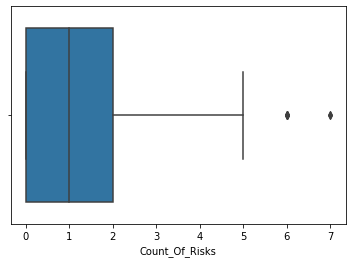

In [ ]:
sns.boxplot(x=df_Risks)

In [ ]:
Q1=df_Risks.quantile(0.25)
Q3=df_Risks.quantile(0.75)
IQR=Q3-Q1

In [ ]:
lower_bound= Q1-1.5*IQR
upper_bound= Q3+ 1.5*IQR

In [ ]:
outlier_risks= (df_Risks< lower_bound) | (df_Risks> upper_bound)
outlier_risks.head()

0    False
1    False
2    False
3    False
4    False
Name: Count_Of_Risks, dtype: bool

In [ ]:
df[outlier_risks]

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
342,P343,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,Y,N,Y,Y,N,N,N,N,N,6
817,P818,Persistent,Female,African American,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,Y,Y,N,N,N,N,N,7
1059,P1060,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,Y,Y,N,N,N,Y,7
2601,P2602,Non-Persistent,Female,Caucasian,Not Hispanic,West,65-75,RHEUMATOLOGY,Specialist,Rheum,...,N,N,Y,Y,Y,N,N,N,Y,6
2860,P2861,Non-Persistent,Male,Caucasian,Not Hispanic,Northeast,65-75,RHEUMATOLOGY,Specialist,Rheum,...,Y,N,Y,N,N,N,N,N,N,6
3045,P3046,Persistent,Female,Other/Unknown,Unknown,Midwest,55-65,RHEUMATOLOGY,Specialist,Rheum,...,Y,N,Y,N,N,N,N,N,N,6
3146,P3147,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,<55,RHEUMATOLOGY,Specialist,Rheum,...,N,Y,Y,Y,N,N,N,N,N,6
3340,P3341,Persistent,Female,Caucasian,Not Hispanic,Northeast,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,Y,N,N,N,N,N,N,N,N,6


In [ ]:
df[outlier_risks].index

Int64Index([342, 817, 1059, 2601, 2860, 3045, 3146, 3340], dtype='int64')

## Conclusion: We have 8 outlier variables.

In [ ]:
#solving the outliers for Count Of Risks
df_Risks[outlier_risks]

342     6
817     7
1059    7
2601    6
2860    6
3045    6
3146    6
3340    6
Name: Count_Of_Risks, dtype: int64

In [ ]:
upper_bound

5.0

In [ ]:
df_Risks[outlier_risks]=upper_bound

<ipython-input-133-16770f3f4266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Risks[outlier_risks]=upper_bound


In [ ]:
#checking whether we have changed successfully
df_Risks[outlier_risks]

342     5
817     5
1059    5
2601    5
2860    5
3045    5
3146    5
3340    5
Name: Count_Of_Risks, dtype: int64

## Droping Unknown Values

In [ ]:
df[df['Risk_Segment_During_Rx'] == 'Unknown']['Tscore_Bucket_During_Rx'].value_counts()

Unknown    1497
Name: Tscore_Bucket_During_Rx, dtype: int64

In [ ]:
df[df['Change_T_Score'] == 'Unknown']['Tscore_Bucket_During_Rx'].value_counts()

Unknown    1497
Name: Tscore_Bucket_During_Rx, dtype: int64

In [ ]:
df[df['Tscore_Bucket_During_Rx'] == 'Unknown']['Change_T_Score'].value_counts()

Unknown    1497
Name: Change_T_Score, dtype: int64

In [ ]:
df[df['Change_Risk_Segment'] == 'Unknown']['Change_T_Score'].value_counts()

Unknown      1497
No change     601
Worsened       83
Improved       48
Name: Change_T_Score, dtype: int64

In [ ]:
#dropping columns that contains many 'Unknown' values
df.drop(['Risk_Segment_During_Rx','Tscore_Bucket_During_Rx','Change_T_Score','Change_Risk_Segment'], axis = 1, inplace = True)

## Exporting and Reading the Cleaned Data

In [ ]:
df.to_csv("Healthcare_cleaned_dataset.csv", index = False)

In [ ]:
# Reading the data 

df0 = pd.read_csv("Healthcare_cleaned_dataset.csv")
df0.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


# Feature Engineering

## Transforming Categorical Data : 

In this step, we are going, first, to convert features regarding to the numbers of categories (two categories or multiple categories).Then, we are going to convert Y/N values to 1/0.

In [ ]:
#Converting categorical variables that contains two categories using Label Encoding
two_categ = ['Persistency_Flag','Gender','Ntm_Specialist_Flag','Risk_Segment_Prior_Ntm','Adherent_Flag', 'Tscore_Bucket_Prior_Ntm','Gluco_Record_Prior_Ntm','Gluco_Record_During_Rx','Dexa_During_Rx','Frag_Frac_During_Rx','Adherent_Flag','Idn_Indicator','Injectable_Experience_During_Rx','Frag_Frac_Prior_Ntm']

labenco = LabelEncoder()
for val in two_categ:
    df0[val] = labenco.fit_transform(df0[val])

In [ ]:
#Coverting categorical variables with multiple categories using Label Encoding
multiple_categ = ['Age_Bucket','Ntm_Speciality','Ntm_Speciality_Bucket','Race','Ethnicity','Region']
for column in multiple_categ:
    df0[column] = df0[column].astype('category')
    df0[column] = labenco.fit_transform(df0[column])

Now, as seen in the table, the rest of non encoding columns categorical are Y and N values. So, we are going to replace all o them by 1 and 0 respectively, without encode each column alone.

In [ ]:
#Convert Y/N values to 1/0
df0.replace(('Y', 'N'), (1,0), inplace = True)
df0

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,1,1,2,1,4,3,5,0,1,...,0,0,0,0,0,0,0,0,0,0
1,P2,0,1,1,1,4,0,5,0,1,...,0,0,0,0,0,0,0,0,0,0
2,P3,0,0,3,0,0,1,5,0,1,...,0,1,0,0,0,0,0,0,0,2
3,P4,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,1
4,P5,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,1,0,2,1,3,3,5,0,1,...,0,0,1,0,0,0,0,0,0,1
3420,P3421,1,0,2,1,3,3,34,0,1,...,0,0,0,0,0,0,0,0,0,0
3421,P3422,1,0,2,1,3,3,3,1,0,...,0,0,1,0,0,0,0,0,0,1
3422,P3423,0,0,2,1,3,0,34,0,1,...,0,0,0,0,0,0,0,0,0,0


Now, let's check for data types after data tranformation step.

In [ ]:
df0.dtypes

Ptid                              object
Persistency_Flag                   int32
Gender                             int32
Race                               int32
Ethnicity                          int32
                                   ...  
Risk_Hysterectomy_Oophorectomy     int64
Risk_Estrogen_Deficiency           int64
Risk_Immobilization                int64
Risk_Recurring_Falls               int64
Count_Of_Risks                     int64
Length: 65, dtype: object

In [ ]:
df.to_csv("Healthcare_cleaned_and tranformed_dataset.csv", index = False)